## 3.1

### a

In [1]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [63]:
app = pd.read_csv('ApplianceShipments.csv')

<AxesSubplot:xlabel='Quarter'>

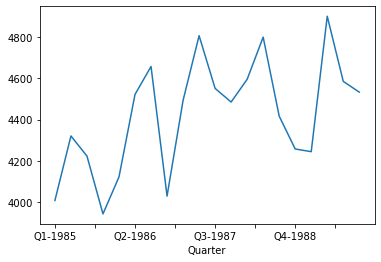

In [64]:
app_ts = pd.Series(app.Shipments.values, index=app.Quarter) 
app_ts.plot() #산점도 그려줌

#b 분기별 패턴이 보이는가, 자세히 보기 위해 y축 확대 3500-5000

<AxesSubplot:xlabel='Quarter'>

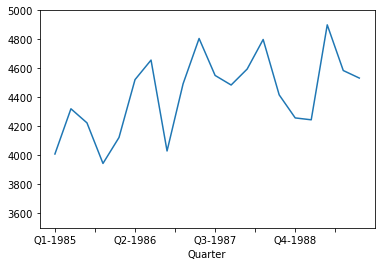

In [65]:
app_ts.plot(ylim=[3500,5000], legend=False) # 특별한 패턴이 보이진 않는다.

### c 
q1 q2 q3 q4에 대해 한 개의 차트에 네개의 선으로 꺽은선 그래프, 각 분기의 데이터를 담고 그것을 선 그래프로 그림, y 축 값범위를 확대하고 분기별 패턴확인

In [ ]:
스플릿으로 언더바 분리
분리하고 다시 합치는데
concat

In [95]:
fig = plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

In [96]:
ax = fig.add_subplot()

In [97]:
a=app.groupby("Quarter")
for i in a:
    ax.plot(i[1]["year"],i[1]["Shipments"],label=i[0])

KeyError: 'year'

In [ ]:
plt.title('Shipments', fontsize=20)
ax.legend()
plt.show()

In [91]:
app1 = app[0:4]
app2 = app[4:8]
app3 = app[8:12]
app4 = app[12:16]
app5 = app[16:20]

#d 각 연도의 shipments 합계를 구하고 선 그래프를 그리시오

In [68]:
app1 = app[0:4]
app2 = app[4:8]
app3 = app[8:12]
app4 = app[12:16]
app5 = app[16:20]

In [78]:
sum=[app1.Shipments.sum(),app2.Shipments.sum(),app3.Shipments.sum(),app4.Shipments.sum(),app5.Shipments.sum()]
sum

[16498, 17332, 18335, 18069, 18263]

In [80]:
years = [1985, 1986, 1987, 1988, 1989]

In [81]:
sum_df=pd.DataFrame({'s':sum, 'y':years})

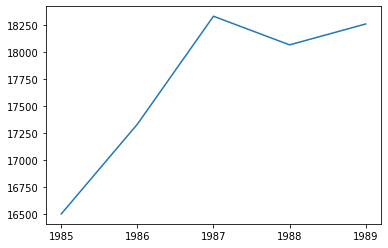

In [90]:
_, ax= plt.subplots()
ax.plot(sum_df['y'], sum_df['s'])
ax = ax.set_xticks([1985, 1986, 1987, 1988, 1989])

## 3.2

In [3]:
rm = pd.read_csv('RidingMowers.csv')

In [4]:
rm_owner=rm[rm['Ownership']=='Owner']
rm_non=rm[rm['Ownership']=='Nonowner']

<AxesSubplot:xlabel='Lot_Size', ylabel='Income'>

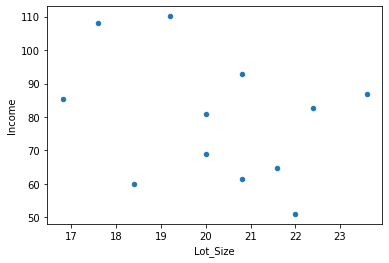

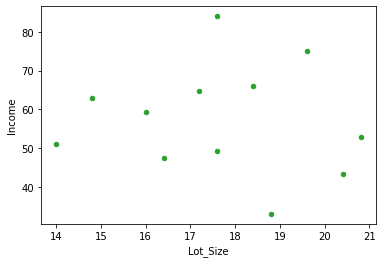

In [5]:
rm_owner.plot.scatter(x='Lot_Size', y='Income', legend='False')
rm_non.plot.scatter(x='Lot_Size', y='Income', legend='False', color='C2')

In [6]:
rm2 = pd.get_dummies(rm['Ownership'])

In [7]:
rm2.head(5)

,Nonowner,Owner
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


<AxesSubplot:xlabel='Income', ylabel='Lot_Size'>

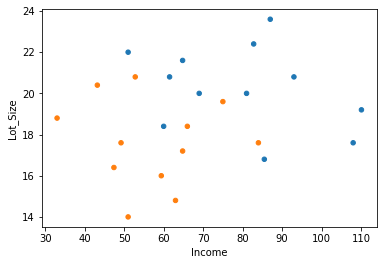

In [57]:
rm.plot.scatter(x='Income', y='Lot_Size', color=['C0' if color == 1 else 'C1'for color in rm2.Owner])

## 3.3

In [14]:
#a

In [16]:
laptop = pd.read_csv('LaptopSalesJanuary2008.csv')

In [18]:
laptop.columns

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'Screen Size (Inches)', 'Battery Life (Hours)',
       'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless?',
       'HD Size (GB)', 'Bundled Applications?', 'OS X Customer',
       'OS Y Customer', 'OS X Store', 'OS Y Store', 'CustomerStoreDistance'],
      dtype='object')

In [38]:
#column 번호를 이용하여 각 col의 이름을 파악했고 각 store의 이름 대신 우편번호로 파악함 

<AxesSubplot:xlabel='Store Postcode'>

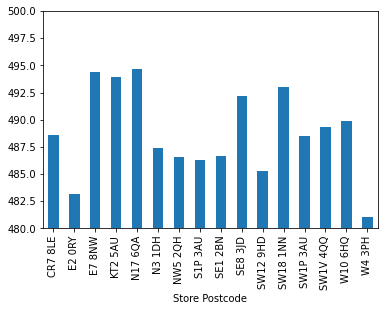

In [41]:
price=laptop.groupby("Store Postcode")["Retail Price"].mean()
price.plot(kind='bar', ylim=[480,500]) # y축 범위를 지정하여 해당구간에서 값 확인

In [ ]:
#b 병렬 박스플롯을 그리시오

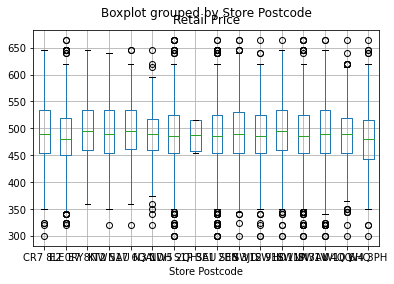

In [100]:
laptop.boxplot(column='Retail Price', by='Store Postcode' )
fig.set_size_inches(200,100) 